#**Travel Insurance Prediction**
*Predict Whether A Customer Will Be Interested In Buying Travel Insurance*<br>
sorce: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data



In [ ]:
#Import Libraries

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Understanding Business Problem
**Problem** : The Company Requires To Know The Which Customers Would Be Interested To Buy Travel Insurance Package.<br>
**Objective** : Customers Prediction.<br>
**Success Metric** : Customers Prediction Accuration > 80%.<br>
**User** : Marketing Team.<br>

#Data Exploration

In [ ]:
#Data Extraction

df = pd.read_csv('/content/drive/MyDrive/Rakamin/Final Project/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


The data consist of 1987 rows and 9 columns.<br>
there is no missing values.<br> 

Looking from data types, it seems the data has no anomaly values.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df.drop(columns=["Unnamed: 0"], inplace=True)

##Univariate Analysis

In [ ]:
#Split data types

cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
num =  ['Age', 'AnnualIncome', 'FamilyMembers']


In [ ]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employment Type      1987 non-null   object
 1   GraduateOrNot        1987 non-null   object
 2   ChronicDiseases      1987 non-null   object
 3   FrequentFlyer        1987 non-null   object
 4   EverTravelledAbroad  1987 non-null   object
 5   TravelInsurance      1987 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


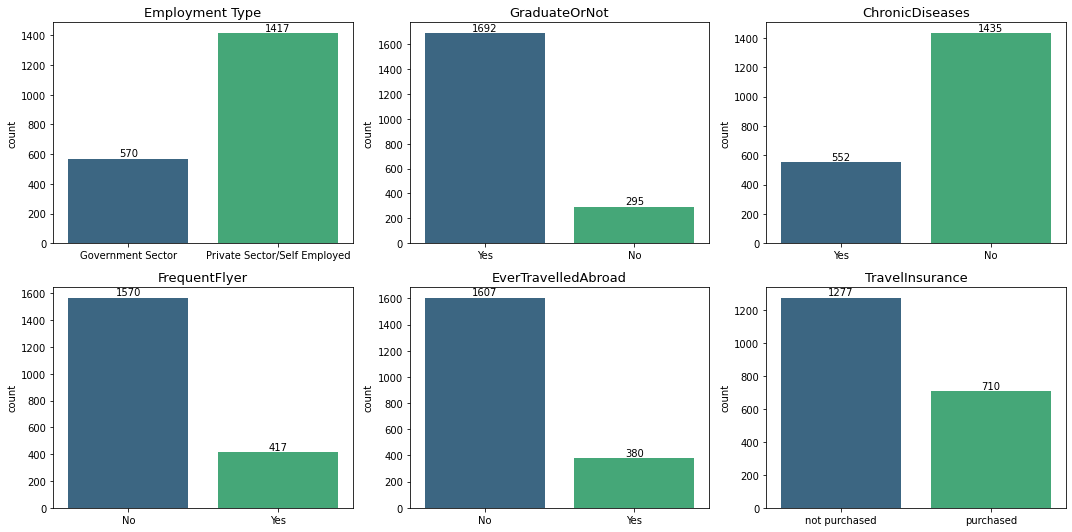

In [ ]:
#Categorical-Univariate Analysis

plt.figure(figsize=(15, 7.5))
for x in range(0, len(cat)):
    plt.subplot(2, 3, x+1)
    ax = sns.countplot(x=df[cat[x]], palette='viridis', data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(cat[x], fontsize = 13)
    plt.xlabel('')
    plt.tight_layout()

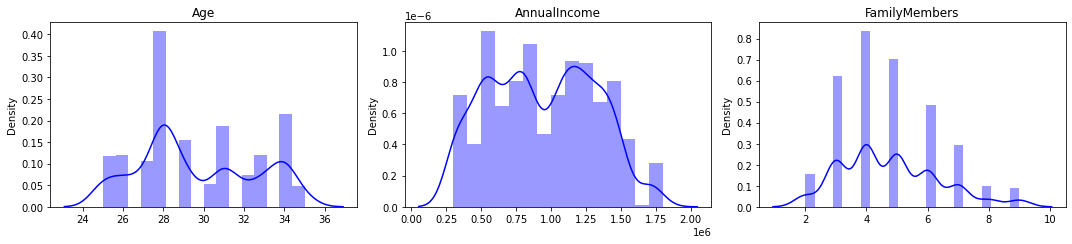

In [ ]:
#Numerical-Univariate Analysis

plt.figure(figsize=(15, 3.5))
for x in range(0, len(num)):
  plt.subplot(1, 3, x+1)
  sns.distplot(df[num[x]], color='b')
  plt.title(num[x], fontsize=12)
  plt.xlabel('')
  plt.tight_layout()

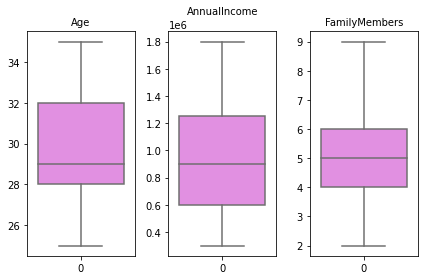

In [ ]:
#Outlier Check

plt.figure(figsize=(6,4))
for x in range(0, len(num)):
  plt.subplot(1, 3, x+1)
  sns.boxplot(df[num[x]], color='violet')
  plt.title(num[x], fontsize = 10)
  plt.tight_layout()

In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


##Bivariate Analysis

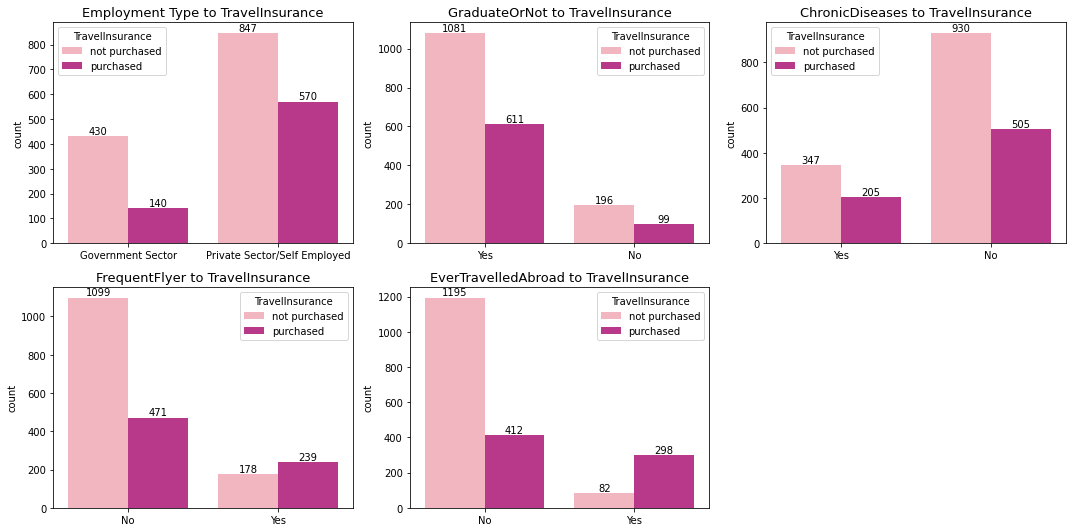

In [ ]:
#Categorical-Bivariate Analysis

plt.figure(figsize=(15, 7.5))
for x in range(0, len(cat)):
  if cat[x] != 'TravelInsurance':
    plt.subplot(2, 3, x+1)
    ax = sns.countplot(x=df[cat[x]], hue='TravelInsurance', palette='RdPu', data=df)
    plt.title(f"{cat[x]} to TravelInsurance", fontsize = 13)
    plt.xlabel('')
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()

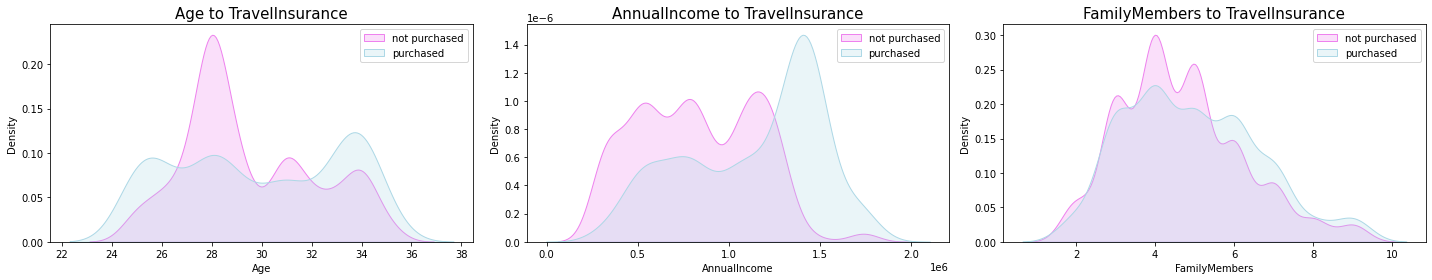

In [ ]:
#Numerical-Bivariate Analysis

plt.figure(figsize=(20, 4))
for x in range(0, len(num)):
    plt.subplot(1, 3, x+1)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 'not purchased') ],
                color="violet", shade = True)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 'purchased') ],
                ax =ax, color="lightblue", shade= True)
    ax.legend(["not purchased","purchased"],loc='upper right')
    plt.title(f'{num[x]} to TravelInsurance', fontsize = 15)
    plt.tight_layout()

##Multivariate

In [ ]:
#Feature Engineering

df["TravelInsurance"]= df["TravelInsurance"].map({"not purchased": 0, "purchased": 1})
df["EverTravelledAbroad"]= df["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
df["FrequentFlyer"]= df["FrequentFlyer"].map({"No": 0, "Yes": 1})
df["ChronicDiseases"]= df["ChronicDiseases"].map({"No": 0, "Yes": 1})
df["GraduateOrNot"]= df["GraduateOrNot"].map({"No": 0, "Yes": 1})
df["Employment Type"]= df["Employment Type"].map({"Private Sector/Self Employed": 0, "Government Sector": 1})
df.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


<Axes: >

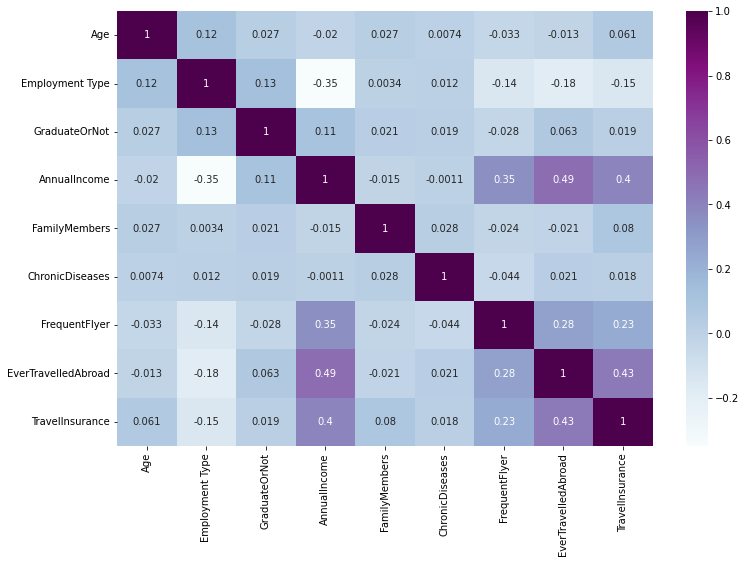

In [ ]:
#Heatmap correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='BuPu')

##Multicoluniarity

VIF ~ 1: Negligible<br>
1<VIF<5 : Moderate<br>
VIF>5 : Extreme<br>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,19.685672,Age
1,1.670286,Employment Type
2,6.916534,GraduateOrNot
3,11.083793,AnnualIncome
4,9.255821,FamilyMembers
5,1.388177,ChronicDiseases
6,1.490678,FrequentFlyer
7,1.801788,EverTravelledAbroad
8,2.058684,TravelInsurance


In [ ]:
iseng = df.drop(['Age'], axis =1)
variables = iseng
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,1.538435,Employment Type
1,6.075981,GraduateOrNot
2,8.264533,AnnualIncome
3,6.149447,FamilyMembers
4,1.374918,ChronicDiseases
5,1.490259,FrequentFlyer
6,1.768194,EverTravelledAbroad
7,2.058338,TravelInsurance
